# Initial data cleaning and EDA (Exploratory Data Analysis)
## By Ioana and Radina
Importing the necessary libraries

In [1]:
import pandas as pd

## Weather data

In [5]:
weather_data = pd.read_parquet('datasets/part-00000-tid-2789511524578721898-08cae995-4879-40e6-b739-92aa0f67bfaa-404-1-c000.snappy.parquet')

weather_data.shape

(19188675, 25)

Checking if the table got imported properly.

In [6]:
weather_data.sample(3)

,STN,YYYYMMDD,H,DD,FH,FF,FX,T,T10N,TD,...,VV,N,U,WW,IX,M,R,S,O,Y
2679241,330,20151121,2,270,140,140,200,67,,9,...,,,66,,6,,,,,
9225669,356,20230531,22,20,40,40,60,127,,102,...,,,84,,6,,,,,
18641689,275,19531126,23,190,,77,,32,,28,...,,8,97,5,,0,0,0,0,0


Changing the column names with the names, suggested by Vanesa.

In [7]:
column_name_mapping = {
    'STN': 'Station ID',
    'YYYYMMDD': 'Date (YYYY-MM-DD)',
    'H': 'Hour',
    'DD': 'Wind Direction (degrees)',
    'FH': 'Hourly Average Wind Speed (m/s)',
    'FF': 'Mean Wind Speed (m/s)',
    'FX': 'Maximum Wind Speed (m/s)',
    'T': 'Temperature (0.1°C)',
    'T10N': 'Minimum Temperature at 10cm (0.1°C)',
    'TD': 'Dew Point Temperature (0.1°C)',
    'SQ': 'Sunshine Duration (hours)',
    'Q': 'Global Radiation (J/cm²)',
    'DR': 'Duration of Precipitation (hours)',
    'RH': 'Precipitation Amount (mm)',
    'P': 'Atmospheric Pressure (hPa)',
    'VV': 'Visibility (m)',
    'N': 'Cloud Cover (oktas)',
    'U': 'Relative Humidity (%)',
    'WW': 'Present Weather',
    'IX': 'Weather Station Type',
    'M': 'Moon Phase',
    'R': 'Rainfall Indicator',
    'S': 'Snow Indicator',
    'O': 'Fog Indicator',
    'Y': 'Ice Formation Indicator'
}

weather_data.rename(columns=column_name_mapping, inplace=True)
weather_data.sample(10)

,Station ID,Date (YYYY-MM-DD),Hour,Wind Direction (degrees),Hourly Average Wind Speed (m/s),Mean Wind Speed (m/s),Maximum Wind Speed (m/s),Temperature (0.1°C),Minimum Temperature at 10cm (0.1°C),Dew Point Temperature (0.1°C),...,Visibility (m),Cloud Cover (oktas),Relative Humidity (%),Present Weather,Weather Station Type,Moon Phase,Rainfall Indicator,Snow Indicator,Fog Indicator,Ice Formation Indicator
2284133,331,20141213,6,230,40,40,50,,,,...,,,,,6,,,,,
15017400,270,19811013,4,260,108,118,154,91,,79,...,60,8,92,80,,0,1,0,0,0
17519884,370,19640723,8,230,,31,,133,70,128,...,34,8,97,20,,0,1,0,0,0
16213986,265,19790505,22,990,15,10,21,20,,-2,...,60,7,85,2,,0,0,0,0,0
13031497,356,19910307,2,110,51,51,72,104,,76,...,,,83,,,,,,,
10896213,311,19970325,22,180,30,30,40,,,,...,,,,,,,,,,
13280596,260,19900208,1,210,113,103,216,142,,106,...,60,8,79,58,,0,1,0,0,0
9764020,330,20000109,5,300,60,50,70,54,,35,...,70,1,88,,2,,,,,
6652305,286,20180831,10,340,30,40,60,176,,117,...,,,68,,6,,,,,
10875014,310,19970304,15,110,80,80,90,104,,91,...,39,8,92,10,1,0,0,0,0,


The names got properly changed. Now, let's do some initial EDA.

In [8]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 25 columns):
 #   Column                               Dtype 
---  ------                               ----- 
 0   Station ID                           object
 1   Date (YYYY-MM-DD)                    object
 2   Hour                                 object
 3   Wind Direction (degrees)             object
 4   Hourly Average Wind Speed (m/s)      object
 5   Mean Wind Speed (m/s)                object
 6   Maximum Wind Speed (m/s)             object
 7   Temperature (0.1°C)                  object
 8   Minimum Temperature at 10cm (0.1°C)  object
 9   Dew Point Temperature (0.1°C)        object
 10  Sunshine Duration (hours)            object
 11  Global Radiation (J/cm²)             object
 12  Duration of Precipitation (hours)    object
 13  Precipitation Amount (mm)            object
 14  Atmospheric Pressure (hPa)           object
 15  Visibility (m)                       object
 16

We can see that all datatypes are "object", even though we see dates and columns, which should be numerical. Therefore, some data cleaning needs to be perfomed. Furthermore, we do not need to make use of all columns, we can select only relevant ones.
By looking at the columns, we concluded that we can exclude the following columns:

<table>
  <tr>
    <td style="text-align: left;"><b>Column name</b></td>
    <td style="text-align: left;"><b>Reason for exclusion</b></td>
  </tr>   
  <tr>
    <td style="text-align: left;">Wind direction</td>
    <td style="text-align: left;">As we do not have relevant information of the roads placement, we cannot rely on wind direction as a prediction feature.</td>
  </tr>  
  <tr>
    <td style="text-align: left;">Minimum Temperature at 10cm (0.1°C)</td>
    <td style="text-align: left;">Since it is the temperature at a depth of 10 cm below soil surface, it is not relevant for predicting travel time.</td>
  </tr>
  <tr>
    <td style="text-align: left;">Sunshine Duration (hours)</td>
    <td style="text-align: left;">Regular working hours are between 9-5, and most of the time it is always light when they travel. Besides, the darkness would not affect the speed of the car by itself.</td>
  </tr>
  <tr>
    <td style="text-align: left;">Global Radiation (J/cm²)</td>
    <td style="text-align: left;">Global radiation is the total solar radiation that falls on a horizontal surface. This has no impact on travel time and speed.</td>
  </tr>
  <tr>
    <td style="text-align: left;">Atmospheric Pressure (hPa)</td>
    <td style="text-align: left;">This is the force exerted on a surface by the air above it as gravity pulls it to Earth. This has little to no effect on driving.</td>
  </tr>
  <tr>
    <td style="text-align: left;">Cloud Cover (oktas)</td>
    <td style="text-align: left;">This is the fraction of the sky obscured by clouds on average when observed from a particular location. Whether it is cloudy or not, it does not affect the travel time.</td>
  </tr>
  <tr>
    <td style="text-align: left;">Relative Humidity (%)</td>
    <td style="text-align: left;">This does not have any direct effect on driving.</td>
  </tr>
  <tr>
    <td style="text-align: left;">Moon Phase</td>
    <td style="text-align: left;">This is a too broad concept, which might impact other weather-related aspects, but not directly driving. Therefore, it is not relevant for our case.</td>
  </tr>
  <tr>
    <td style="text-align: left;">Dew Point Temperature (0.1°C)</td>
    <td style="text-align: left;">The higher the humidity or atmospheric pressure, the higher the dew point temperature. We believe this is irrelevant for the prediction of the speed, as they have little to no effect on driving.</td>
  </tr>
      <tr>
    <td style="text-align: left;">Temperature (0.1°C)</td>
    <td style="text-align: left;">Even though temperature might affect other weather conditions that are relevant for our aim, it is not directly tied to driving time/speed, therefore we drop it.</td>
  </tr>
</table>


In [9]:
columns_to_drop = ['Wind Direction (degrees)', 'Minimum Temperature at 10cm (0.1°C)', 'Sunshine Duration (hours)',
                   'Global Radiation (J/cm²)', 'Atmospheric Pressure (hPa)', 'Cloud Cover (oktas)',
                   'Relative Humidity (%)', 'Moon Phase', 'Dew Point Temperature (0.1°C)', 'Temperature (0.1°C)']

weather_data.drop(columns=columns_to_drop, inplace=True)
weather_data

,Station ID,Date (YYYY-MM-DD),Hour,Hourly Average Wind Speed (m/s),Mean Wind Speed (m/s),Maximum Wind Speed (m/s),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Present Weather,Weather Station Type,Rainfall Indicator,Snow Indicator,Fog Indicator,Ice Formation Indicator
0,209,20060201,1,40,40,50,,,,,6,,,,
1,209,20060201,2,40,40,60,,,,,6,,,,
2,209,20060201,3,30,30,50,,,,,6,,,,
3,209,20060201,4,20,10,40,,,,,6,,,,
4,209,20060201,5,20,20,40,,,,,6,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19188670,380,19510131,20,0,0,,,,,44,,0,0,0,0
19188671,380,19510131,21,0,0,,,,,44,,0,0,0,0
19188672,380,19510131,22,0,0,,,,,45,,0,0,0,0
19188673,380,19510131,23,0,0,,,,,47,,0,0,0,0


Now, after seeing that the columns are in the wrong data type and after removing some columns, let's also check the explicitly missing values.

In [10]:
weather_data.isna().sum()

Station ID                           0
Date (YYYY-MM-DD)                    0
Hour                                 0
Hourly Average Wind Speed (m/s)      0
Mean Wind Speed (m/s)                0
Maximum Wind Speed (m/s)             0
Duration of Precipitation (hours)    0
Precipitation Amount (mm)            0
Visibility (m)                       0
Present Weather                      0
Weather Station Type                 0
Rainfall Indicator                   0
Snow Indicator                       0
Fog Indicator                        0
Ice Formation Indicator              0
dtype: int64

While we seem to **not have missing data**, based on the NAs check, there are actually **empty strings** in the columns. Therefore, we need to first clean the empty strings, before changing the data types and proceeding further.

Because of the invisible NAs, we decided to convert all of the columns to numeric type and wherever we got an error (which is the actual incinsistency of the data), we **converted it to NA** in order to make the issue visible.

In [11]:
#Changing the date to date format
weather_data['Date (YYYY-MM-DD)'] = pd.to_datetime(weather_data['Date (YYYY-MM-DD)'], format='%Y%m%d')

#Making the hour an integer
weather_data['Hour'] = weather_data['Hour'].astype(int)

#Making the station ID an integer
weather_data['Station ID'] = weather_data['Station ID'].astype(int)

#Converting all of the other columns into numeric values and substituting errors with NAs
columns_to_convert = [
    'Hourly Average Wind Speed (m/s)',
    'Mean Wind Speed (m/s)',
    'Maximum Wind Speed (m/s)',
    'Duration of Precipitation (hours)',
    'Precipitation Amount (mm)',
    'Visibility (m)',
    'Present Weather',
    'Weather Station Type',
    'Rainfall Indicator',
    'Snow Indicator',
    'Fog Indicator',
    'Ice Formation Indicator'
]

#Looping through the list of columns
for column in columns_to_convert:
#Checking also for trailing and leading empty spaces, before replacing errors with NAs
    weather_data[column] = weather_data[column].str.replace(r'\D', '', regex=True)
    weather_data[column] = pd.to_numeric(weather_data[column], errors='coerce')

#Checking the final result
weather_data.sample(10)

,Station ID,Date (YYYY-MM-DD),Hour,Hourly Average Wind Speed (m/s),Mean Wind Speed (m/s),Maximum Wind Speed (m/s),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Present Weather,Weather Station Type,Rainfall Indicator,Snow Indicator,Fog Indicator,Ice Formation Indicator
11862025,225,1995-05-29,2,41.0,51.0,67.0,NaN,NaN,58.0,10.0,1.0,NaN,NaN,NaN,NaN
14639393,350,1985-12-13,21,41.0,46.0,77.0,10.0,4.0,18.0,51.0,NaN,1.0,0.0,0.0,0.0
18162194,210,1969-06-12,6,NaN,31.0,NaN,NaN,NaN,56.0,5.0,NaN,0.0,0.0,0.0,0.0
14508746,285,1985-04-10,6,36.0,36.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1192888,286,2011-11-28,17,40.0,50.0,60.0,0.0,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
12390853,310,1991-08-05,14,36.0,31.0,72.0,0.0,1.0,68.0,25.0,NaN,1.0,0.0,0.0,0.0
16244948,380,1979-07-15,24,31.0,31.0,41.0,0.0,0.0,56.0,10.0,NaN,0.0,0.0,0.0,0.0
8088815,242,2017-07-18,24,100.0,90.0,120.0,NaN,NaN,70.0,NaN,5.0,0.0,0.0,0.0,0.0
18046641,210,1968-07-26,13,NaN,87.0,NaN,NaN,NaN,68.0,2.0,NaN,0.0,0.0,0.0,0.0
8816912,315,2022-05-26,9,70.0,70.0,90.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN


Checking the data type now to see if every column got updated properly.

In [12]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 15 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Station ID                         int32         
 1   Date (YYYY-MM-DD)                  datetime64[ns]
 2   Hour                               int32         
 3   Hourly Average Wind Speed (m/s)    float64       
 4   Mean Wind Speed (m/s)              float64       
 5   Maximum Wind Speed (m/s)           float64       
 6   Duration of Precipitation (hours)  float64       
 7   Precipitation Amount (mm)          float64       
 8   Visibility (m)                     float64       
 9   Present Weather                    float64       
 10  Weather Station Type               float64       
 11  Rainfall Indicator                 float64       
 12  Snow Indicator                     float64       
 13  Fog Indicator                      float64       
 14  

It seems that all of the data types are correct now. Let's also check the missing values again as now we expect to have many more than before:

In [13]:
weather_data.isna().sum()

Station ID                                  0
Date (YYYY-MM-DD)                           0
Hour                                        0
Hourly Average Wind Speed (m/s)       2221137
Mean Wind Speed (m/s)                  380534
Maximum Wind Speed (m/s)              2969856
Duration of Precipitation (hours)     7516068
Precipitation Amount (mm)             7385292
Visibility (m)                        7268187
Present Weather                      10793640
Weather Station Type                  8109170
Rainfall Indicator                    8264516
Snow Indicator                        8264518
Fog Indicator                         8264491
Ice Formation Indicator               8663080
dtype: int64

Just as we expected, we have many missing values as now the empty strings are replaced with NAs and can finally be visible. Now, let's see a description of the values in the dataset:

In [14]:
columns = [
    'Station ID',
    'Date (YYYY-MM-DD)',
    'Hour',
    'Hourly Average Wind Speed (m/s)',
    'Mean Wind Speed (m/s)',
    'Maximum Wind Speed (m/s)',
    'Duration of Precipitation (hours)',
    'Precipitation Amount (mm)',
    'Visibility (m)',
    'Present Weather',
    'Weather Station Type',
    'Rainfall Indicator',
    'Snow Indicator',
    'Fog Indicator',
    'Ice Formation Indicator'
]

min_values = []
max_values = []
mean_values = []
median_values = []

for column in columns:
    min_values.append(weather_data[column].min())
    max_values.append(weather_data[column].max())
    mean_values.append(weather_data[column].mean())
    median_values.append(weather_data[column].median())

# Create a DataFrame with minimum and maximum values
weather_data_descr = pd.DataFrame({'Column': columns,
                        'Min Value': min_values,
                        'Mean Value': mean_values,
                        'Median Value': median_values,
                        'Max Value': max_values})
weather_data_descr

,Column,Min Value,Mean Value,Median Value,Max Value
0,Station ID,209,297.353128,286.0,391
1,Date (YYYY-MM-DD),1951-01-01 00:00:00,1997-01-09 01:39:42.260099072,2000-12-25 00:00:00,2024-03-25 00:00:00
2,Hour,1,12.500096,13.0,24
3,Hourly Average Wind Speed (m/s),0.0,50.865118,46.0,324.0
4,Mean Wind Speed (m/s),0.0,50.231749,41.0,499.0
5,Maximum Wind Speed (m/s),0.0,77.743834,70.0,640.0
6,Duration of Precipitation (hours),0.0,0.727973,0.0,39.0
7,Precipitation Amount (mm),0.0,0.986595,0.0,790.0
8,Visibility (m),0.0,58.458932,62.0,99.0
9,Present Weather,0.0,19.508779,10.0,99.0


## Traffic data

In [16]:
traffic_jam = pd.read_parquet('datasets/part-00000-tid-5723335361199544621-d336d8d1-1073-410a-866c-3445c2fec160-222-1-c000.snappy.parquet')

traffic_jam.shape

(1581781, 26)

Checking if the table got imported properly.

In [17]:
traffic_jam.sample(3)

,NLSitNummer,DatumFileBegin,DatumFileEind,TijdFileBegin,TijdFileEind,FileZwaarte,GemLengte,FileDuur,HectometerKop,HectometerStaart,...,TrajVan,TrajNaar,OorzaakGronddetail,OorzaakVerloop,OorzaakCodeVerloop,OorzaakCode,Oorzaak_1,Oorzaak_2,Oorzaak_3,Oorzaak_4
1236496,2500330,2019-02-19,2019-02-19,17:40:00,18:31:17,"153,850","3000,000","51,283","15,5","12,5",...,Maasbracht,Nijmegen,Defect(e) voertuig(en),"[Defect(e) voertuig(en) 37], [Eerder pechgeval...","[BKD], [M13]",BKD,Defect(e) voertuig(en),Defect voertuig,Incident (gestrand voertuig),Incident
413592,3052045,2022-05-31,2022-05-31,8:04:27,8:06:03,"3,200","2000,000","1,600","160,6","158,6",...,Oss,Arnhem,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
1562789,2780351,2020-08-29,2020-08-29,14:53:00,15:17:04,"60,267","2504,155","24,067","31,2","35,2",...,Gouda,Hoek van Holland,File buiten spits (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 24],[000],003,File buiten spits (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit


Changing the names with the names suggested by Vanesa.

In [19]:
english_column_names = [
    'Site Number', 'Start Date of Traffic Jam', 'End Date of Traffic Jam', 'Start Time of Traffic Jam',
    'End Time of Traffic Jam', 'Traffic Jam Severity', 'Average Length', 'Duration of Traffic Jam', 
    'Start Hectometer Marker', 'End Hectometer Marker', 'Route Letter', 'Route Number', 'Route Description',
    'Hectometer Direction', 'Start Section From', 'Start Section To', 'From', 'To',
    'Detailed Cause', 'Cause Progression', 'Cause Progression Code', 'Cause Code', 'Cause 1', 
    'Cause 2', 'Cause 3', 'Cause 4'
]

traffic_jam.columns = english_column_names

traffic_jam.sample(10)

,Site Number,Start Date of Traffic Jam,End Date of Traffic Jam,Start Time of Traffic Jam,End Time of Traffic Jam,Traffic Jam Severity,Average Length,Duration of Traffic Jam,Start Hectometer Marker,End Hectometer Marker,...,From,To,Detailed Cause,Cause Progression,Cause Progression Code,Cause Code,Cause 1,Cause 2,Cause 3,Cause 4
1395391,2083771,2017-01-03,2017-01-03,17:32:00,17:46:39,"32,300","2204,778","14,650","32,8","30,8",...,Amsterdam,Amersfoort,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
586331,3896499,2024-01-08,2024-01-08,16:36:30,16:39:00,"9,347","3739,000","2,500","52,7","49,0",...,Den Haag,Rotterdam,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
492838,3659535,2023-07-25,2023-07-25,16:53:29,16:58:00,"9,683","2144,000","4,517","71,6","73,7",...,Zurich,Den Oever,Spitsfile (geen oorzaak gemeld) met gevonden w...,[Geen oorzaakcode opgegeven door VWM 5],[000],002,Spitsfile (geen oorzaak gemeld) met gevonden w...,Geen oorzaak gemeld,Drukte,Hoge intensiteit
23618,3588319,2023-06-13,2023-06-13,14:18:28,14:23:00,"9,618","2122,000","4,533","46,9","44,8",...,Amstelveen,Alkmaar,File buiten spits (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 5],[000],003,File buiten spits (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
1103382,2173911,2017-06-15,2017-06-15,16:35:00,16:49:57,"38,933","2604,236","14,950","39,7","37,7",...,Rotterdam,Breda,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
1100940,2164475,2017-06-01,2017-06-01,7:56:00,8:08:34,"25,133","2000,000","12,567","84,7","86,7",...,Arnhem,Utrecht,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 13],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
1293286,2480853,2019-01-17,2019-01-17,7:45:00,7:46:39,"3,300","2000,000","1,650","61,1","63,1",...,Alkmaar,Amstelveen,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
648393,2656091,2019-10-21,2019-10-21,8:09:00,8:38:00,"58,000","2000,000","29,000","33,2","35,2",...,Den Haag,Amsterdam,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 29],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
647707,2659050,2019-10-24,2019-10-24,16:18:00,16:37:43,"47,517","2409,975","19,717","51,5","49,5",...,Amsterdam,Utrecht,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 20],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
746380,3105777,2022-07-01,2022-07-01,16:07:27,16:13:01,"13,540","2432,000","5,567","49,0","51,3",...,Rotterdam,Den Haag,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit


The names got properly changed. Now, let's do some initial EDA.

In [20]:
traffic_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581781 entries, 0 to 1581780
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Site Number                1581781 non-null  object
 1   Start Date of Traffic Jam  1581781 non-null  object
 2   End Date of Traffic Jam    1581781 non-null  object
 3   Start Time of Traffic Jam  1581781 non-null  object
 4   End Time of Traffic Jam    1581781 non-null  object
 5   Traffic Jam Severity       1581781 non-null  object
 6   Average Length             1581781 non-null  object
 7   Duration of Traffic Jam    1581781 non-null  object
 8   Start Hectometer Marker    1581781 non-null  object
 9   End Hectometer Marker      1581781 non-null  object
 10  Route Letter               1581781 non-null  object
 11  Route Number               1581781 non-null  object
 12  Route Description          1581781 non-null  object
 13  Hectometer Direction       

In [21]:
traffic_jam.isna().sum()

Site Number                    0
Start Date of Traffic Jam      0
End Date of Traffic Jam        0
Start Time of Traffic Jam      0
End Time of Traffic Jam        0
Traffic Jam Severity           0
Average Length                 0
Duration of Traffic Jam        0
Start Hectometer Marker        0
End Hectometer Marker          0
Route Letter                   0
Route Number                   0
Route Description              0
Hectometer Direction           0
Start Section From            11
Start Section To               0
From                           0
To                             0
Detailed Cause               109
Cause Progression            109
Cause Progression Code       109
Cause Code                   109
Cause 1                        0
Cause 2                        0
Cause 3                        0
Cause 4                       13
dtype: int64

We can see that **all datatypes are again "object"**, even though many of them should be numerical. Furthermore, we have just a few nulls and it seems that there could be some **dependency in the way the data is missing** as the same number of missing values is repeated for 4 of the columns and, therefore, that needs to be investigated further. 
In essence, some **data cleaning** needs to be done before proceeding further. 

In [22]:
#Converting the date columns to date datatype
date_columns = ['Start Date of Traffic Jam', 'End Date of Traffic Jam']
traffic_jam[date_columns] = traffic_jam[date_columns].apply(pd.to_datetime)

#Since I couldn't create a proper time format, I created two additional columns with start datetime and end datetime
traffic_jam['Start Datetime'] = pd.to_datetime(traffic_jam['Start Date of Traffic Jam'].astype(str) + ' ' + traffic_jam['Start Time of Traffic Jam'].astype(str))
traffic_jam['End Datetime'] = pd.to_datetime(traffic_jam['End Date of Traffic Jam'].astype(str) + ' ' + traffic_jam['End Time of Traffic Jam'].astype(str))

# Converting numerical columns to float and changing the coma to a point in order to help python recognize the format
columns_to_convert = ['Traffic Jam Severity', 
                      'Average Length', 
                      'Duration of Traffic Jam', 
                      'Start Hectometer Marker', 
                      'End Hectometer Marker']
for col in columns_to_convert:
    traffic_jam[col] = traffic_jam[col].str.replace(',', '.').astype(float)
    
#Converting the integer column to integer format
traffic_jam['Route Number'] = traffic_jam['Route Number'].astype(int)

In [23]:
traffic_jam

,Site Number,Start Date of Traffic Jam,End Date of Traffic Jam,Start Time of Traffic Jam,End Time of Traffic Jam,Traffic Jam Severity,Average Length,Duration of Traffic Jam,Start Hectometer Marker,End Hectometer Marker,...,Detailed Cause,Cause Progression,Cause Progression Code,Cause Code,Cause 1,Cause 2,Cause 3,Cause 4,Start Datetime,End Datetime
0,3589057,2023-06-13,2023-06-13,16:54:29,17:00:06,13.480,2400.000,5.617,45.6,47.9,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:00:06
1,3589058,2023-06-13,2023-06-13,16:54:29,17:09:01,46.287,3185.000,14.533,31.4,28.2,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:09:01
2,3589060,2023-06-13,2023-06-13,16:54:29,16:56:05,5.120,3200.000,1.600,166.5,169.7,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 16:56:05
3,3589061,2023-06-13,2023-06-13,16:54:29,17:06:00,29.525,2564.000,11.517,82.8,85.6,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:06:00
4,3589062,2023-06-13,2023-06-13,16:54:29,17:04:00,28.952,3042.000,9.517,144.3,140.6,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581776,2756774,2020-04-10,2020-04-10,6:31:00,7:14:41,102.150,2338.421,43.683,52.3,50.3,...,Opruimwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 1], [Opru...","[000], [CLE]",CLE,Opruimwerkzaamheden,Opruimwerkzaamheden,Incident (opruimwerkzaamheden),Incident,2020-04-10 06:31:00,2020-04-10 07:14:41
1581777,2756818,2020-04-10,2020-04-10,16:46:00,17:35:32,139.217,2810.565,49.533,146.2,144.2,...,Ongeval (met opruim/berging),"[Opruimingswerkzaamheden 46], [Eerder(e) ongev...","[OCL], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-10 16:46:00,2020-04-10 17:35:32
1581778,2756726,2020-04-09,2020-04-09,14:14:00,14:17:40,7.333,2000.000,3.667,30.0,32.0,...,"Te hoog voertuig gesignaleerd, wordt afgehandeld","[Geen oorzaakcode opgegeven door VWM 1], [Te h...","[000], [OHW], [000]",OHW,"Te hoog voertuig gesignaleerd, wordt afgehandeld",Hoogtemelding,Incident,Incident,2020-04-09 14:14:00,2020-04-09 14:17:40
1581779,2756735,2020-04-09,2020-04-09,16:03:00,16:15:27,25.900,2080.321,12.450,51.5,53.5,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2020-04-09 16:03:00,2020-04-09 16:15:27


In [24]:
traffic_jam[traffic_jam['Start Date of Traffic Jam'] != traffic_jam['End Date of Traffic Jam']] 

,Site Number,Start Date of Traffic Jam,End Date of Traffic Jam,Start Time of Traffic Jam,End Time of Traffic Jam,Traffic Jam Severity,Average Length,Duration of Traffic Jam,Start Hectometer Marker,End Hectometer Marker,...,Detailed Cause,Cause Progression,Cause Progression Code,Cause Code,Cause 1,Cause 2,Cause 3,Cause 4,Start Datetime,End Datetime
6536,3568729,2023-06-03,2023-06-04,23:52:22,0:31:03,111.825,2891.000,38.683,62.6,59.0,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 4], [Wegw...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-03 23:52:22,2023-06-04 00:31:03
11132,3571530,2023-06-05,2023-06-06,23:54:20,0:51:48,208.273,3624.000,57.467,55.1,50.1,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 10], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-05 23:54:20,2023-06-06 00:51:48
11133,3571532,2023-06-05,2023-06-06,23:59:20,1:34:20,264.233,2781.000,95.000,79.1,76.7,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 5], [Wegw...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-05 23:59:20,2023-06-06 01:34:20
13722,3576406,2023-06-07,2023-06-08,21:13:25,0:42:54,597.529,2852.000,209.483,44.1,41.3,...,Werkzaamheden (en file buiten spits zonder oor...,"[Geen oorzaakcode opgegeven door VWM 59], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-07 21:13:25,2023-06-08 00:42:54
14007,3576426,2023-06-07,2023-06-08,22:13:23,0:07:33,284.758,2494.000,114.167,15.4,12.8,...,File buiten spits zonder oorzaak (met werkzaam...,"[Geen oorzaakcode opgegeven door VWM 60], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-07 22:13:23,2023-06-08 00:07:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566172,2762411,2020-06-06,2020-06-07,23:52:00,0:45:47,161.350,3000.000,53.783,88.4,91.4,...,Ongeval (met ander incident),"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [ACI], [N03]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-06-06 23:52:00,2020-06-07 00:45:47
1566195,2761918,2020-06-03,2020-06-04,23:46:00,0:27:21,123.900,2996.372,41.350,126.0,124.0,...,Ongeval(len),[Ongeval(len) 41],[ACI],ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-06-03 23:46:00,2020-06-04 00:27:21
1569386,2811903,2021-04-16,2021-04-17,21:32:00,0:07:07,456.083,2940.260,155.117,29.6,31.6,...,Werkzaamheden op aansluitende weg,"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [N65], [RWK], [N60]",N60,Werkzaamheden op aansluitende weg,Werkzaamheden elders,Werkzaamheden,Aanleg en gepland onderhoud,2021-04-16 21:32:00,2021-04-17 00:07:07
1578962,2798351,2020-12-30,2020-12-31,18:57:00,1:16:19,1549.400,4084.714,379.317,95.3,93.3,...,Ongeval vrachtwagen (met spoedreparatie),"[Ongeval(len) 16], [Ongeval met vrachtwagen(s)...","[ACI], [ACH], [N32]",ACH,Ongeval met vrachtwagen(s),Ongeval vrachtwagen,Ongeval,Ongeval,2020-12-30 18:57:00,2020-12-31 01:16:19


In [25]:
traffic_jam[['Route Letter', 'Route Number', 'Route Description', 'Hectometer Direction', 'Start Section From', 'Start Section To', 'From', 'To']]

,Route Letter,Route Number,Route Description,Hectometer Direction,Start Section From,Start Section To,From,To
0,A,15,A15,aflopend,Botlekbrug,Spijkenisse,Ridderkerk,Europoort
1,A,27,A27,oplopend,Nieuwendijk,Werkendam,Breda,Gorinchem
2,A,50,A50,aflopend,Grijsoord,Renkum,Arnhem,Oss
3,A,58,A58,aflopend,Rucphen,Sint Willebrord,Bergen op Zoom,Breda
4,A,59,A59,oplopend,Rosmalen-Oost,Kruisstraat,'s-Hertogenbosch,Oss
...,...,...,...,...,...,...,...,...
1581776,A,16,A16,oplopend,Zevenbergschen Hoek,Zonzeel,Rotterdam,Breda
1581777,A,59,A59,oplopend,Kruisstraat,Nuland,'s-Hertogenbosch,Oss
1581778,A,10,A10,aflopend,Coentunnel,Amsterdam-Hemhavens,Watergraafsmeer,De Nieuwe Meer
1581779,A,12,A12,aflopend,Harmelen,Harmelen,Utrecht,Den Haag


In [26]:
traffic_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581781 entries, 0 to 1581780
Data columns (total 28 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Site Number                1581781 non-null  object        
 1   Start Date of Traffic Jam  1581781 non-null  datetime64[ns]
 2   End Date of Traffic Jam    1581781 non-null  datetime64[ns]
 3   Start Time of Traffic Jam  1581781 non-null  object        
 4   End Time of Traffic Jam    1581781 non-null  object        
 5   Traffic Jam Severity       1581781 non-null  float64       
 6   Average Length             1581781 non-null  float64       
 7   Duration of Traffic Jam    1581781 non-null  float64       
 8   Start Hectometer Marker    1581781 non-null  float64       
 9   End Hectometer Marker      1581781 non-null  float64       
 10  Route Letter               1581781 non-null  object        
 11  Route Number               1581781 no

Now, all of the columns are in the correct data type. Let's check if we have any connection between the missing information. First, I am extracting the column names of columns with NAs.

In [27]:
columns_with_missing_data = traffic_jam.columns[traffic_jam.isnull().any()].tolist()
columns_with_missing_data

['Start Section From',
 'Detailed Cause',
 'Cause Progression',
 'Cause Progression Code',
 'Cause Code',
 'Cause 4']

Then, I am getting only for these columns the rows with missing data.

In [28]:
missing_data = traffic_jam[traffic_jam[columns_with_missing_data].isna().any(axis=1)][columns_with_missing_data]
missing_data

,Start Section From,Detailed Cause,Cause Progression,Cause Progression Code,Cause Code,Cause 4
304110,Emmen-Oost,Let op: langza(a)m(e) voertuig(en),"[Geen oorzaakcode opgegeven door VWM 16], [Let...","[000], [VSM]",VSM,None
816546,None,Ongeval(len),"[Ongeval(len) 28], [Eerder(e) ongeval(len) 6]","[ACI], [ACA]",ACI,Ongeval
914353,None,Ongeval(len),"[Geen oorzaakcode opgegeven door VWM 0], [Onge...","[000], [ACI], [ACA]",ACI,Ongeval
959778,Heerenveen-West,Let op: langza(a)m(e) voertuig(en),"[Geen oorzaakcode opgegeven door VWM 15], [Let...","[000], [VSM]",VSM,None
987906,Randwyck,None,None,None,None,Hoge intensiteit
...,...,...,...,...,...,...
1536767,Beverwijk-Oost,None,None,None,None,Hoge intensiteit
1540901,Amc Ziekenhuis,Dit bericht is voor testdoeleinden. Gelieve he...,[Dit bericht is voor testdoeleinden. Gelieve h...,[TMO],TMO,None
1547650,None,File buiten spits (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 54],[000],003,Hoge intensiteit
1568355,Kerensheide,Spitsstrook aan de rechterzijde in gebruik,"[Geen oorzaakcode opgegeven door VWM 1], [Spit...","[000], [N48]",N48,None


Apparently, in Python, apart from NaN, **None** is also identified as a missing value. Based on the definition of w3schools, "The None keyword is used to define a null value, or no value at all. None is not the same as 0, False, or an empty string". I tried to also check what is the difference between NaN and None and according to Medium (https://medium.com/data-and-beyond/none-nan-null-and-zero-in-python-ac326cfb73a2):

* **None**: Represents **the absence of a value or a null value** in Python. It signifies that a variable or object doesn’t refer to any specific data. It’s essentially **a placeholder for the absence of a meaningful value**.

* **NaN (Not a Number)**: Stands for undefined or nonsensical numerical values in Python, particularly in the context of numerical computations. It’s a marker used in numeric operations to **represent invalid or undefined results**.

That means that in our case, simply no data was recorded at all and we got a **placeholder for the absence of a meaningful value**. 

Now, I will try to ivestigate whether there is any dependency in the way the data is missing by checking all the combinations of missing values that exist:

In [29]:
print(columns_with_missing_data)
missing_data.isna().apply(tuple, axis=1).value_counts()

['Start Section From', 'Detailed Cause', 'Cause Progression', 'Cause Progression Code', 'Cause Code', 'Cause 4']


(False, True, True, True, True, False)       109
(False, False, False, False, False, True)     13
(True, False, False, False, False, False)     11
Name: count, dtype: int64

We can deduce that:
* The *Start Section From* column is always **missing independently from other columns** and there are 11 such instances
* The *Cause 4* column is always **missing independently from other columns** and there are 13 such instances
* The *Detailed Cause*, *Cause Progression*, *Cause Progression Code* and *Cause Code* columns are **always missing in a combination** in 119 instances, which might indicate that they have some **dependency** in the way they are missing.

## Weather stations data

In [31]:
weather_stations = pd.read_csv("datasets/weather_stations.csv")
weather_stations.head()

,STN,LON(east),LAT(north),ALT(m),NAME
0,209,4.518,52.465,0.0,IJmond
1,210,4.430,52.171,-0.2,Valkenburg Zh
2,215,4.437,52.141,-1.1,Voorschoten
3,225,4.555,52.463,4.4,IJmuiden
4,235,4.781,52.928,1.2,De Kooy


In [32]:
weather_stations.shape

(50, 5)

In [33]:
weather_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STN         50 non-null     int64  
 1   LON(east)   50 non-null     float64
 2   LAT(north)  50 non-null     float64
 3   ALT(m)      50 non-null     float64
 4   NAME        50 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


We can see that the datatypes seem to correspong to what is expected for each column.

In [34]:
weather_stations.isna().sum()

STN           0
LON(east)     0
LAT(north)    0
ALT(m)        0
NAME          0
dtype: int64

There seem to be no NAs in our data. Next, we should check the ranges and see if they fall in realistic categories.

In [35]:
weather_stations.describe()

,STN,LON(east),LAT(north),ALT(m)
count,50.000000,50.000000,50.000000,50.00000
mean,295.240000,5.034120,52.155380,8.79000
std,47.221821,0.996242,0.675282,18.89544
min,209.000000,3.242000,50.906000,-4.30000
25%,261.250000,4.320250,51.536750,0.00000
50%,285.500000,4.957500,52.084500,1.30000
75%,328.500000,5.759500,52.641500,11.62500
max,391.000000,7.150000,53.575000,114.30000


At a first glance, the values look normal. The points as latitude and longitude seem to mostly fit in the Netherlands borders. As noted after research, Netherlands coresponds to the coordinates of ~53.51 LAT(north) and ~3.36 LON(east). We can have a look at approximate maximum and minimum:

* MAX LON : ~7.22 LON(east) 
* MAX LAT : ~53.51 LAT(north)
* MIN LON : ~3.36 LON(east)
* MIN LAT : ~50.75 LAT(north)

As specified, these seem to fit quite well in the ranges, with very slight, insignificant differences. We can, however, continue with our analysis. Later on, we will look into altitude as well.

We can have a look at the map, with each station's positioning. This would not only confirm, once again, the accuracy of the positions, but also give us an idea and overview of the exact positioning of each on the map.

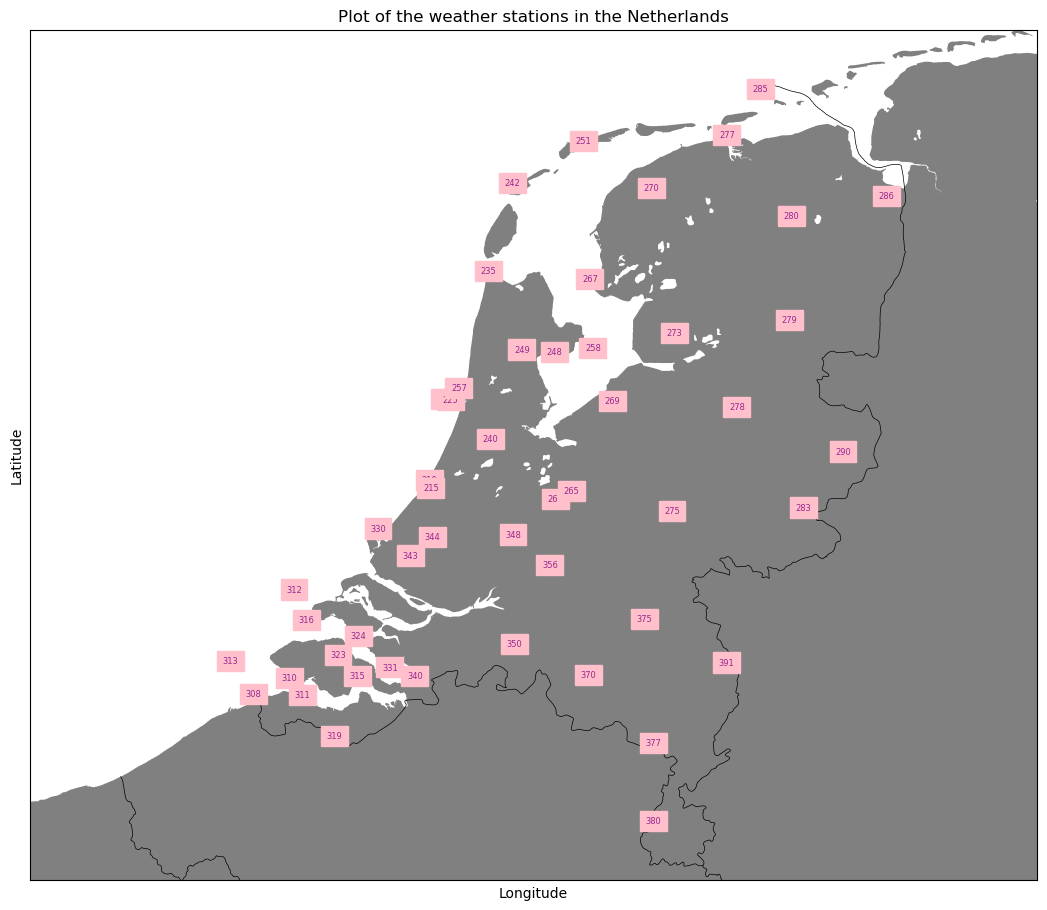

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(13, 12))

map = Basemap(projection='merc', 
              resolution='f', 
              llcrnrlat=50.7, urcrnrlat=53.8, 
              llcrnrlon=2, urcrnrlon=8, 
              lat_ts=51)
# Plot map
map.drawcountries()
map.fillcontinents(color='grey', zorder=0)

# Plot weather station points with values as labels
x, y = map(weather_stations['LON(east)'], weather_stations['LAT(north)'])
for i in range(len(x)):
    # Adjust label placement and font size, offset labels, and use transparent background
    plt.text(x[i], y[i], f'{weather_stations["STN"][i]}', ha='right', va='bottom', fontsize=6, color='purple', backgroundcolor='pink', alpha=0.8)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot of the weather stations in the Netherlands')

plt.show()

We can now check the distribution of the altitudes.

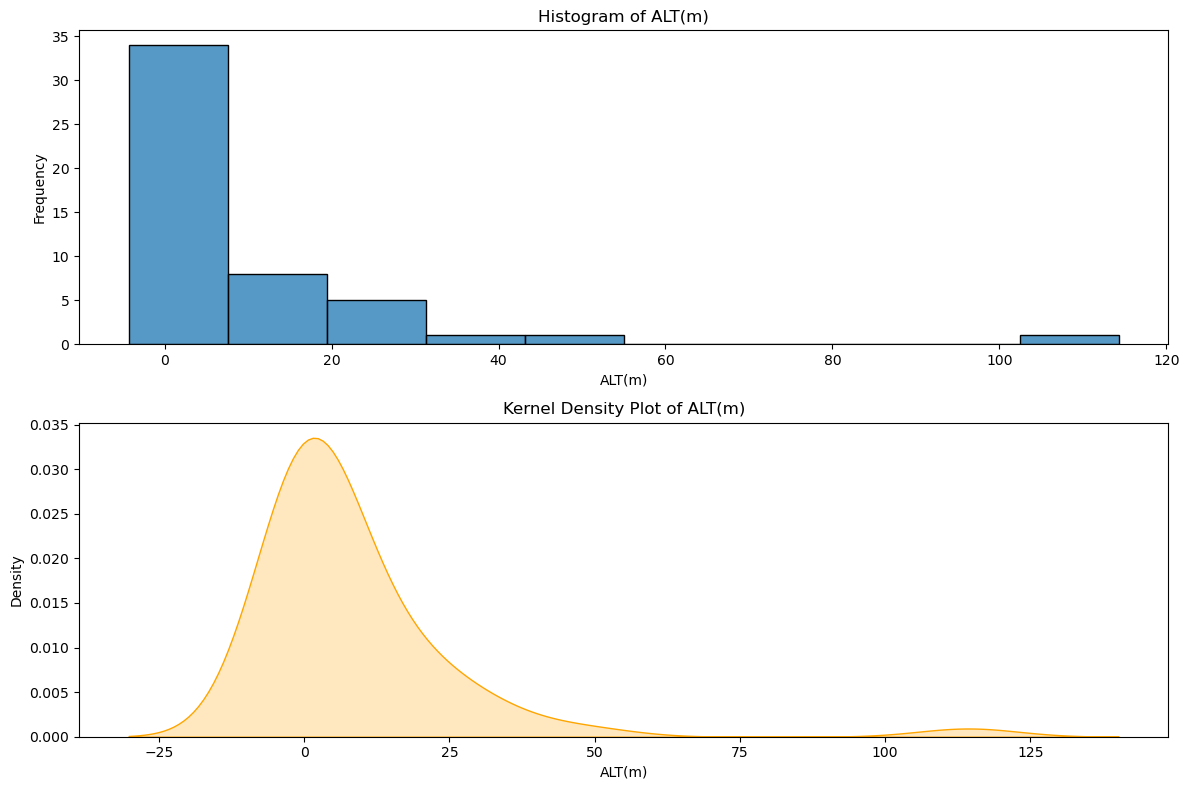

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

altitudes = weather_stations['ALT(m)']

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
sns.histplot(altitudes, ax=axes[0], bins=10, kde=False)  #histogram
axes[0].set_title('Histogram of ALT(m)')
axes[0].set_xlabel('ALT(m)')
axes[0].set_ylabel('Frequency')
sns.kdeplot(altitudes, ax=axes[1], color='orange', fill=True) #kernel density plot
axes[1].set_title('Kernel Density Plot of ALT(m)')
axes[1].set_xlabel('ALT(m)')
axes[1].set_ylabel('Density')
plt.tight_layout()
plt.show()

We can see that most weather stations are at an altitude of around 0 and slightly larger, which is expected from a country that does not have any mountains. There seems to be an outlier station, that is situated at a much higher altitude than the others. Let's see where that actually is and if it makes sense.

In [38]:
weather_stations[weather_stations['ALT(m)'] == max(altitudes)]

,STN,LON(east),LAT(north),ALT(m),NAME
48,380,5.762,50.906,114.3,Maastricht


We can see this is situated in Maastricht. When we look it up online, we can see the value is accurate and the station and its coordinates actually exists. Therefore, we can state that it is reliable and consider it correct. Similarly, we can check the lowest altitude we have in our dataset, to see if it is accurate.

![Screenshot 2024-04-09 205409.png](<attachment:Screenshot 2024-04-09 205409.png>)
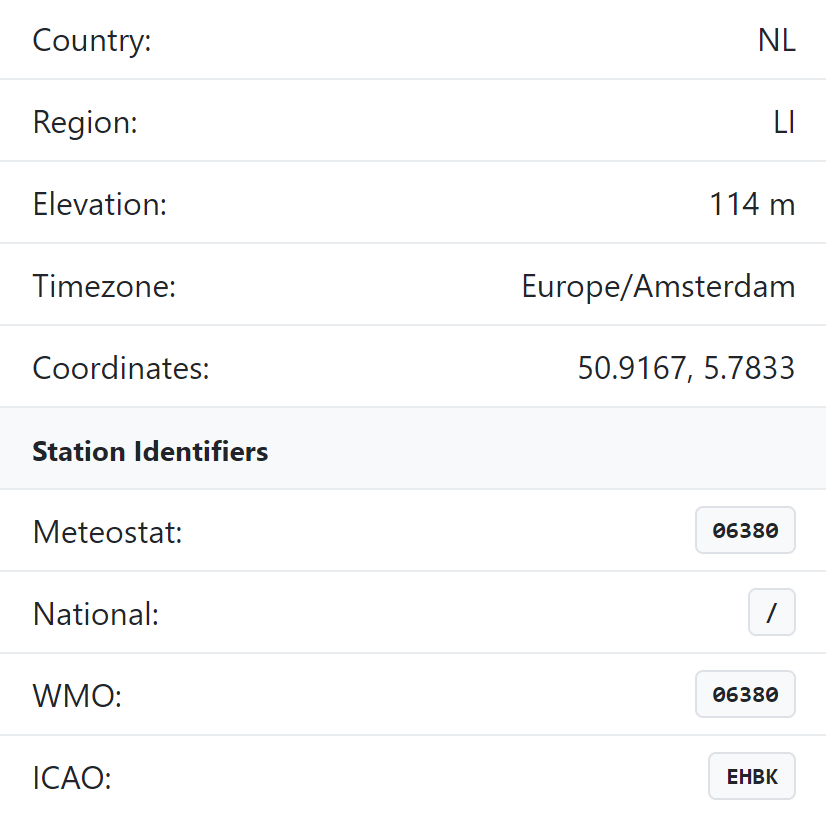

In [39]:
weather_stations[weather_stations['ALT(m)'] == min(altitudes)]

,STN,LON(east),LAT(north),ALT(m),NAME
41,344,4.447,51.962,-4.3,Rotterdam


This one seems to be located in Rotterdam. Since it is a harbour city, it makes sense that we have, in these kind of cities, stations under sea level. 

It might be relevant that we consider only data from weather stations that are close to the cities of interest. Initially, we tried considering the closest 3 stations to each city that our customer needs to travel to. However, due to large number of data, we were forced to reduce it to only one weather station per city. Below, I calculate the exact distance, in km, from the closest weather station for each city, as well as the number of the specific station.

In [40]:
from geopy.distance import geodesic

# Coordinates of Hertogenbosch, Sittard, and Boxmeer
cities = {
    'Hertogenbosch': (51.6978, 5.3037),
    'Sittard': (50.9989, 5.866),
    'Boxmeer': (51.6444, 5.9473)
}

# Function to calculate distance between two points using geopy
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Calculate distances for each city and sort weather stations based on distance
closest_stations = {}
for city, city_coords in cities.items():
    distances = {}
    for index, row in weather_stations.iterrows():
        station_coords = (row['LAT(north)'], row['LON(east)'])
        station_id = row['STN']
        distance = calculate_distance(city_coords, station_coords)
        distances[station_id] = distance
    closest_stations[city] = sorted(distances.items(), key=lambda x: x[1])[:1]

# Print the closest weather stations for each city
for city, stations in closest_stations.items():
    print(f"Closest weather stations to {city}:")
    for station_id, distance in stations:
        print(f"Station ID: {station_id}, Distance: {distance:.2f} km")
    print()

Closest weather stations to Hertogenbosch:
Station ID: 356, Distance: 20.98 km

Closest weather stations to Sittard:
Station ID: 380, Distance: 12.66 km

Closest weather stations to Boxmeer:
Station ID: 375, Distance: 16.71 km



# Data preparation for joining

As we want to join based on only the closest weather station to each city of interest, we store these stations' names in a variable, that we later use to filter the weather data to only display records that are coming from these 3 stations of interest. 

In [41]:
unique_ids = set(id_ for station_list in closest_stations.values() for id_, _ in station_list)
unique_ids

{356, 375, 380}

In [42]:
filtered_weather_data = weather_data[weather_data['Station ID'].isin(unique_ids)]
filtered_weather_data

,Station ID,Date (YYYY-MM-DD),Hour,Hourly Average Wind Speed (m/s),Mean Wind Speed (m/s),Maximum Wind Speed (m/s),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Present Weather,Weather Station Type,Rainfall Indicator,Snow Indicator,Fog Indicator,Ice Formation Indicator
1008,356,2006-02-01,1,30.0,30.0,50.0,0.0,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
1009,356,2006-02-01,2,30.0,40.0,60.0,0.0,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
1010,356,2006-02-01,3,40.0,40.0,60.0,0.0,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
1011,356,2006-02-01,4,30.0,40.0,50.0,0.0,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
1012,356,2006-02-01,5,30.0,30.0,50.0,0.0,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19188670,380,1951-01-31,20,0.0,0.0,NaN,NaN,NaN,NaN,44.0,NaN,0.0,0.0,0.0,0.0
19188671,380,1951-01-31,21,0.0,0.0,NaN,NaN,NaN,NaN,44.0,NaN,0.0,0.0,0.0,0.0
19188672,380,1951-01-31,22,0.0,0.0,NaN,NaN,NaN,NaN,45.0,NaN,0.0,0.0,0.0,0.0
19188673,380,1951-01-31,23,0.0,0.0,NaN,NaN,NaN,NaN,47.0,NaN,0.0,0.0,0.0,0.0


To join later on date and hour, we want to make a new column containing only the hour of the traffic jam start.

In [43]:
traffic_jam['Hour'] = traffic_jam['Start Time of Traffic Jam'].apply(lambda x: x.split(':')[0]).astype(int)
traffic_jam

,Site Number,Start Date of Traffic Jam,End Date of Traffic Jam,Start Time of Traffic Jam,End Time of Traffic Jam,Traffic Jam Severity,Average Length,Duration of Traffic Jam,Start Hectometer Marker,End Hectometer Marker,...,Cause Progression,Cause Progression Code,Cause Code,Cause 1,Cause 2,Cause 3,Cause 4,Start Datetime,End Datetime,Hour
0,3589057,2023-06-13,2023-06-13,16:54:29,17:00:06,13.480,2400.000,5.617,45.6,47.9,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:00:06,16
1,3589058,2023-06-13,2023-06-13,16:54:29,17:09:01,46.287,3185.000,14.533,31.4,28.2,...,[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:09:01,16
2,3589060,2023-06-13,2023-06-13,16:54:29,16:56:05,5.120,3200.000,1.600,166.5,169.7,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 16:56:05,16
3,3589061,2023-06-13,2023-06-13,16:54:29,17:06:00,29.525,2564.000,11.517,82.8,85.6,...,[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:06:00,16
4,3589062,2023-06-13,2023-06-13,16:54:29,17:04:00,28.952,3042.000,9.517,144.3,140.6,...,[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:04:00,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581776,2756774,2020-04-10,2020-04-10,6:31:00,7:14:41,102.150,2338.421,43.683,52.3,50.3,...,"[Geen oorzaakcode opgegeven door VWM 1], [Opru...","[000], [CLE]",CLE,Opruimwerkzaamheden,Opruimwerkzaamheden,Incident (opruimwerkzaamheden),Incident,2020-04-10 06:31:00,2020-04-10 07:14:41,6
1581777,2756818,2020-04-10,2020-04-10,16:46:00,17:35:32,139.217,2810.565,49.533,146.2,144.2,...,"[Opruimingswerkzaamheden 46], [Eerder(e) ongev...","[OCL], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-10 16:46:00,2020-04-10 17:35:32,16
1581778,2756726,2020-04-09,2020-04-09,14:14:00,14:17:40,7.333,2000.000,3.667,30.0,32.0,...,"[Geen oorzaakcode opgegeven door VWM 1], [Te h...","[000], [OHW], [000]",OHW,"Te hoog voertuig gesignaleerd, wordt afgehandeld",Hoogtemelding,Incident,Incident,2020-04-09 14:14:00,2020-04-09 14:17:40,14
1581779,2756735,2020-04-09,2020-04-09,16:03:00,16:15:27,25.900,2080.321,12.450,51.5,53.5,...,[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2020-04-09 16:03:00,2020-04-09 16:15:27,16


To get an overview of the times when most traffic jams happen, we can create a line/bar chart.

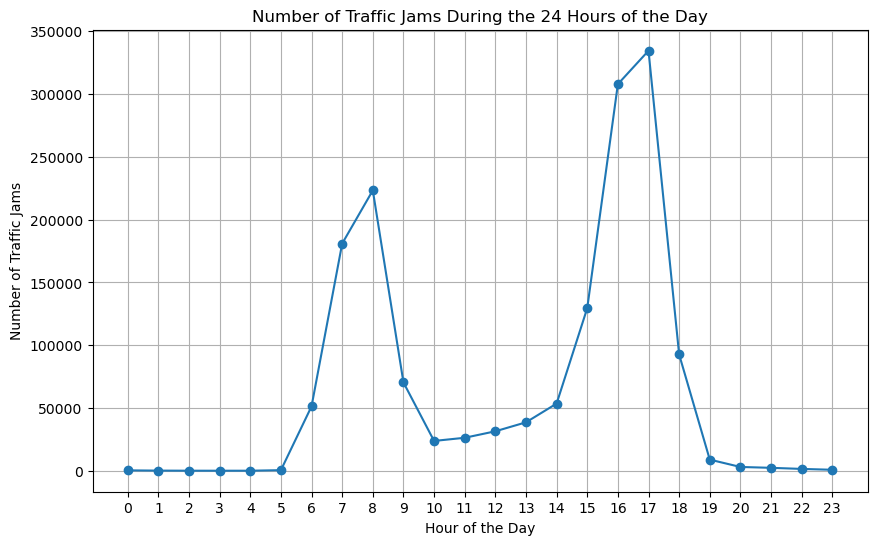

In [44]:
hourly_counts = traffic_jam['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Traffic Jams')
plt.title('Number of Traffic Jams During the 24 Hours of the Day')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()

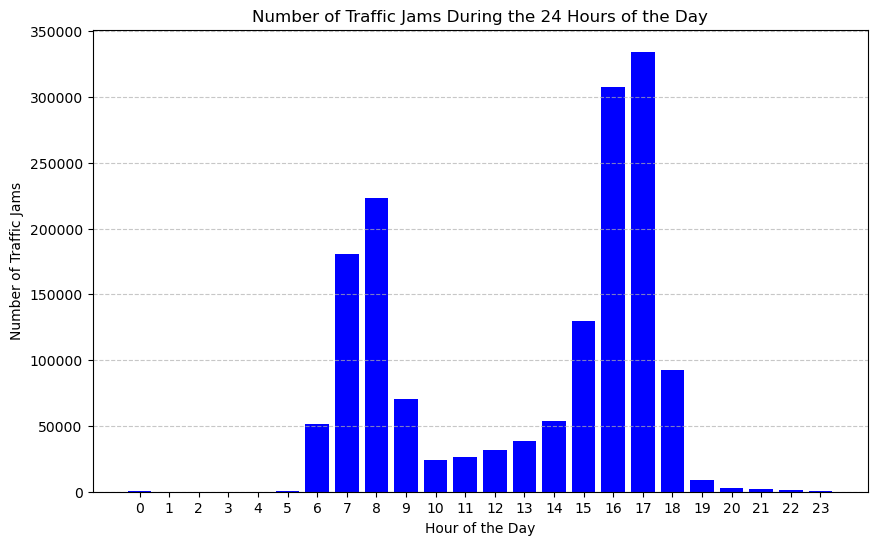

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Traffic Jams')
plt.title('Number of Traffic Jams During the 24 Hours of the Day')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As expected, it seems that most traffic jams happen during the morning, mainly between 7 and 9, as well as at the end of the workday, approximately from 16 to 18. This matches perfectly with the 9 to 17 schedule most people work by.

#### A2 and A73 

As we want to only have the specific roads that our client can possibly use to reach the offices, we will prepare the data for joining by filtering on the roads A2 and A73.

In [46]:
filtered_traffic= traffic_jam[(traffic_jam['Route Description'] == 'A73') | (traffic_jam['Route Description'] == 'A2')]
filtered_traffic


,Site Number,Start Date of Traffic Jam,End Date of Traffic Jam,Start Time of Traffic Jam,End Time of Traffic Jam,Traffic Jam Severity,Average Length,Duration of Traffic Jam,Start Hectometer Marker,End Hectometer Marker,...,Cause Progression,Cause Progression Code,Cause Code,Cause 1,Cause 2,Cause 3,Cause 4,Start Datetime,End Datetime,Hour
7,3589149,2023-06-13,2023-06-13,17:03:29,17:17:00,32.867,2432.000,13.517,115.9,118.1,...,[Geen oorzaakcode opgegeven door VWM 14],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 17:03:29,2023-06-13 17:17:00,17
41,3589794,2023-06-13,2023-06-13,18:37:28,18:43:00,16.465,2976.000,5.533,92.0,89.5,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 18:37:28,2023-06-13 18:43:00,18
61,3590025,2023-06-14,2023-06-14,7:12:25,7:25:02,41.488,3288.000,12.617,43.8,41.4,...,[Geen oorzaakcode opgegeven door VWM 13],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:12:25,2023-06-14 07:25:02,7
66,3590065,2023-06-14,2023-06-14,7:25:25,8:07:00,216.928,5217.000,41.583,44.2,40.0,...,[Geen oorzaakcode opgegeven door VWM 42],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:25:25,2023-06-14 08:07:00,7
74,3590164,2023-06-14,2023-06-14,7:49:26,7:51:00,3.447,2200.000,1.567,105.5,103.3,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:49:26,2023-06-14 07:51:00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581684,2757675,2020-04-23,2020-04-23,12:12:00,12:32:56,57.350,2739.650,20.933,162.3,164.3,...,"[Geen oorzaakcode opgegeven door VWM 1], [Defe...","[000], [BKD], [000]",BKD,Defect(e) voertuig(en),Defect voertuig,Incident (gestrand voertuig),Incident,2020-04-23 12:12:00,2020-04-23 12:32:56,12
1581715,2757792,2020-04-24,2020-04-24,13:35:00,13:45:06,20.200,2000.000,10.100,219.2,221.2,...,"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [ACI], [000]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-24 13:35:00,2020-04-24 13:45:06,13
1581760,2756631,2020-04-08,2020-04-08,12:58:00,15:06:07,405.883,3168.076,128.117,90.6,92.6,...,"[Geen oorzaakcode opgegeven door VWM 3], [Opru...","[000], [OCL], [HBD], [OCL]",HBD,Defecte vrachtwagen(s),Defecte vrachtwagen,Incident (gestrand voertuig),Incident,2020-04-08 12:58:00,2020-04-08 15:06:07,12
1581765,2756680,2020-04-09,2020-04-09,6:25:00,6:31:41,13.367,2000.000,6.683,68.9,70.9,...,"[Ongeval(len) 5], [Eerder(e) ongeval(len) 2]","[ACI], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-09 06:25:00,2020-04-09 06:31:41,6


# Data joining

First, we join the weather data with the stations data, so we can have now the details of the stations and the daily weather values in one table.

In [47]:
merged_weather_data = pd.merge(weather_stations, filtered_weather_data, left_on='STN', right_on='Station ID')
merged_weather_data

,STN,LON(east),LAT(north),ALT(m),NAME,Station ID,Date (YYYY-MM-DD),Hour,Hourly Average Wind Speed (m/s),Mean Wind Speed (m/s),Maximum Wind Speed (m/s),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Present Weather,Weather Station Type,Rainfall Indicator,Snow Indicator,Fog Indicator,Ice Formation Indicator
0,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,1,30.0,30.0,50.0,0.0,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
1,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,2,30.0,40.0,60.0,0.0,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
2,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,3,40.0,40.0,60.0,0.0,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
3,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,4,30.0,40.0,50.0,0.0,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
4,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,5,30.0,30.0,50.0,0.0,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576537,380,5.762,50.906,114.3,Maastricht,380,1951-01-31,20,0.0,0.0,NaN,NaN,NaN,NaN,44.0,NaN,0.0,0.0,0.0,0.0
1576538,380,5.762,50.906,114.3,Maastricht,380,1951-01-31,21,0.0,0.0,NaN,NaN,NaN,NaN,44.0,NaN,0.0,0.0,0.0,0.0
1576539,380,5.762,50.906,114.3,Maastricht,380,1951-01-31,22,0.0,0.0,NaN,NaN,NaN,NaN,45.0,NaN,0.0,0.0,0.0,0.0
1576540,380,5.762,50.906,114.3,Maastricht,380,1951-01-31,23,0.0,0.0,NaN,NaN,NaN,NaN,47.0,NaN,0.0,0.0,0.0,0.0


Finally, we reach our (initial) final table by performing a left join on the previously created table and the traffic data we filtered. We decided to join based on both date and hour, so in this way we can keep records of all days and hours recorded by the weather stations we selected. In the future, we can try reducing this number by removing some dates that might be too far in the past to be relevant, but this is the table we will keep for now.

In [48]:
merged_data = pd.merge(merged_weather_data, filtered_traffic, left_on=['Date (YYYY-MM-DD)', 'Hour'], right_on=['Start Date of Traffic Jam', 'Hour'], how = 'left')
merged_data

,STN,LON(east),LAT(north),ALT(m),NAME,Station ID,Date (YYYY-MM-DD),Hour,Hourly Average Wind Speed (m/s),Mean Wind Speed (m/s),...,Detailed Cause,Cause Progression,Cause Progression Code,Cause Code,Cause 1,Cause 2,Cause 3,Cause 4,Start Datetime,End Datetime
0,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,1,30.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,2,30.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,3,40.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,4,30.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,5,30.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089648,380,5.762,50.906,114.3,Maastricht,380,1951-01-31,20,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2089649,380,5.762,50.906,114.3,Maastricht,380,1951-01-31,21,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2089650,380,5.762,50.906,114.3,Maastricht,380,1951-01-31,22,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2089651,380,5.762,50.906,114.3,Maastricht,380,1951-01-31,23,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


## EDA on (initial) final dataset 
#### For the requested weather stations and roads

We will add a new column, that displays the weekday name of each date.

In [49]:
merged_data['Date (YYYY-MM-DD)']= pd.to_datetime(merged_data['Date (YYYY-MM-DD)'])

merged_data['Weekday Name'] = merged_data['Date (YYYY-MM-DD)'].dt.day_name()

merged_data

,STN,LON(east),LAT(north),ALT(m),NAME,Station ID,Date (YYYY-MM-DD),Hour,Hourly Average Wind Speed (m/s),Mean Wind Speed (m/s),...,Cause Progression,Cause Progression Code,Cause Code,Cause 1,Cause 2,Cause 3,Cause 4,Start Datetime,End Datetime,Weekday Name
0,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,1,30.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,Wednesday
1,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,2,30.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,Wednesday
2,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,3,40.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,Wednesday
3,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,4,30.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,Wednesday
4,356,5.146,51.859,0.7,Herwijnen,356,2006-02-01,5,30.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089648,380,5.762,50.906,114.3,Maastricht,380,1951-01-31,20,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,Wednesday
2089649,380,5.762,50.906,114.3,Maastricht,380,1951-01-31,21,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,Wednesday
2089650,380,5.762,50.906,114.3,Maastricht,380,1951-01-31,22,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,Wednesday
2089651,380,5.762,50.906,114.3,Maastricht,380,1951-01-31,23,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,Wednesday


In [50]:
unique_dates_weekdays = merged_data.drop_duplicates(subset=['Date (YYYY-MM-DD)', 'Weekday Name'])

unique_dates_weekdays['Weekday Name'].value_counts()

Weekday Name
Wednesday    3821
Thursday     3821
Friday       3821
Saturday     3821
Sunday       3821
Monday       3821
Tuesday      3821
Name: count, dtype: int64

It seems that we have a perfectly even distribution of records for each weekday. It might be interesting to see how much out of each is days with traffic jams.

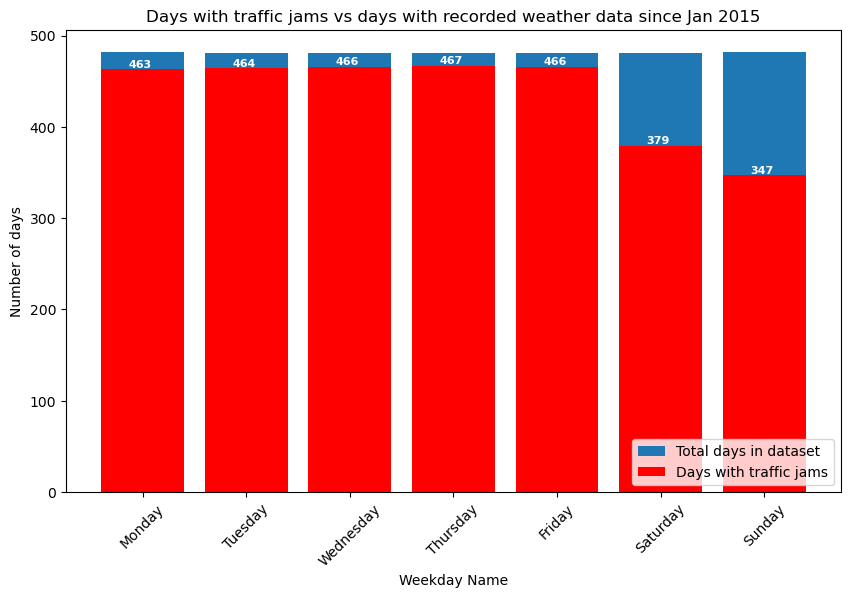

In [51]:
# Unique weekdays in the dataset with recorded weather data
unique_dates_weekdays = merged_data.drop_duplicates(subset=['Date (YYYY-MM-DD)', 'Weekday Name'])
min_date = merged_data['Start Date of Traffic Jam'].min()
unique_dates_weekdays = unique_dates_weekdays[unique_dates_weekdays['Date (YYYY-MM-DD)'] >= min_date]
value_counts = unique_dates_weekdays['Weekday Name'].value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_value_counts = value_counts.reindex(weekday_order)

# Unique days with traffic jams (one or more)
unique_weekdays_with_traffic = merged_data.drop_duplicates(subset=['Start Date of Traffic Jam', 'Weekday Name']) 
value_counts_traffic = unique_weekdays_with_traffic['Weekday Name'].value_counts()
sorted_value_counts_traffic = value_counts_traffic.reindex(weekday_order)

plt.figure(figsize=(10, 6))
bars1 =plt.bar(sorted_value_counts.index, sorted_value_counts.values)
bars = plt.bar(sorted_value_counts_traffic.index, sorted_value_counts_traffic.values, color = 'red')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3.0, yval, int(yval), va='bottom',fontsize=8, color='white',  fontweight='bold')

plt.xlabel('Weekday Name')
plt.ylabel('Number of days')
plt.title('Days with traffic jams vs days with recorded weather data since Jan 2015')
plt.xticks(rotation=45)
plt.legend([bars1, bars], ['Total days in dataset', 'Days with traffic jams'], loc='lower right')
plt.show()


We can see, as expected, that the weekends have significantly less traffic jams than the workdays. This could be due people not having to go to work.

Since we can see that the traffic data starts from 2015, whereas the weather data states even back to 1951, it created a huge number of NAs in our final table. We can, for the future, consider reducing the dataset to only records starting 2015.

In [52]:
print(merged_data['Start Date of Traffic Jam'].min())
print(merged_data['Date (YYYY-MM-DD)'].min())

2015-01-04 00:00:00
1951-01-01 00:00:00


By having a first glance at the data, we could guess that each cause code seems to display the same values for Cause 1, Cause 2, Cause 3 and Cause 4, in the same order. We could check that by trying to concatinate all the values and see if we end up having the length of the output.

In [53]:
merged_data['Cause Code'].value_counts()

Cause Code
001    458127
003     64614
ACI     18984
002      8121
HBD      4317
        ...  
N71         3
N70         3
LS2         3
M01         3
EVF         3
Name: count, Length: 119, dtype: int64

In [54]:
combined_columns = merged_data['Cause Code'].astype(str) + merged_data['Cause 1'].astype(str) + \
                   merged_data['Cause 2'].astype(str) + merged_data['Cause 3'].astype(str) + \
                   merged_data['Cause 4'].astype(str)

combined_columns.value_counts()


nannannannannan                                                                                          1515018
001Spitsfile (geen oorzaak gemeld)Geen oorzaak gemeldDrukteHoge intensiteit                               458127
003File buiten spits (geen oorzaak gemeld)Geen oorzaak gemeldDrukteHoge intensiteit                        64614
ACIOngeval(len)OngevalOngevalOngeval                                                                       18984
002Spitsfile (geen oorzaak gemeld) met gevonden werk in SpinGeen oorzaak gemeldDrukteHoge intensiteit       8121
                                                                                                          ...   
N71Incident op stedelijke wegStedelijke wegAndere wegbeheerderOverige oorzaken                                 3
BCLDefect(e) voertuig(en)Defect voertuigIncident (gestrand voertuig)Incident                                   3
TCNFilevormingDrukteDrukteHoge intensiteit                                                      

While we have 119 unique cause code, there are 3 more rows for the concatinated version, with Cause code, Cause 1,2,3 and 4, therefore suggesting that most cause codes resemble, in the same order, the same causes. In the concatinated version, we see merged NAs as values, that are not counted in the initial unique code search, and therefore can be excluded for here. This means that, however, there are 2 combinations which do not adhere to the before observed rule, therefore requiring some more inspection.

 If we go back to the cleaning performed on the traffic data, we could observe there were some NAs for Cause 4, as well as some for Cause Code. This might, therefore, be the reason we get 2 different combinations, because the concatinated version created above would just paste the NA instead.

 For now, we can proceed to see which are the top 10 cause codes responsible for most traffic jams.

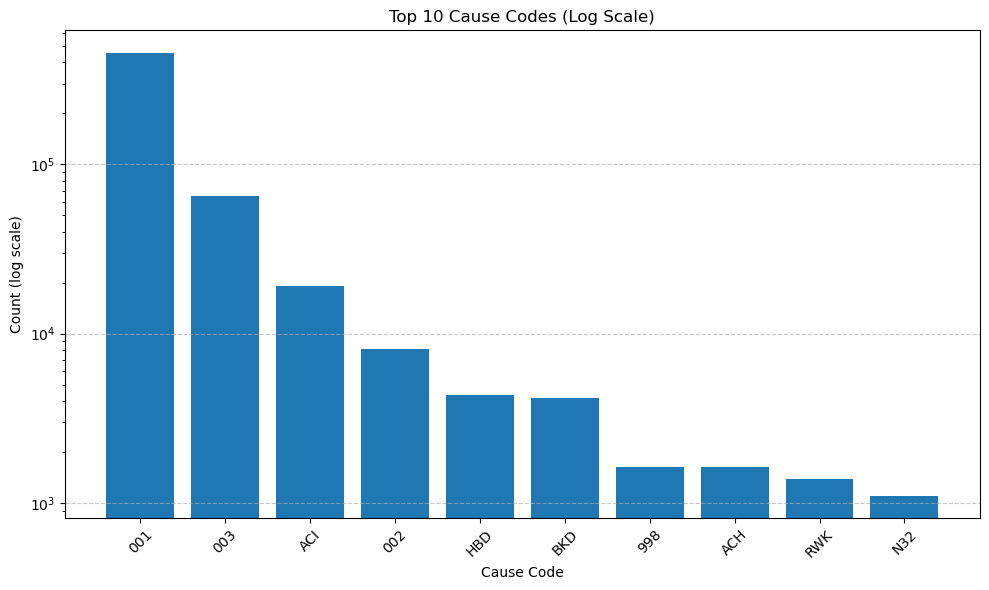

In [55]:
top_n = 10

cause_code_counts = merged_data['Cause Code'].value_counts()
#Since we see big differenc between causes, we will select the top 10
top_cause_code_counts = cause_code_counts.head(top_n)

plt.figure(figsize=(10, 6))
plt.bar(top_cause_code_counts.index, top_cause_code_counts)
plt.yscale('log') 
plt.title(f'Top {top_n} Cause Codes (Log Scale)')
plt.xlabel('Cause Code')
plt.ylabel('Count (log scale)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can try spotting some initial relationships between relevant variables by creating a pairplot.

c:\Users\zashe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


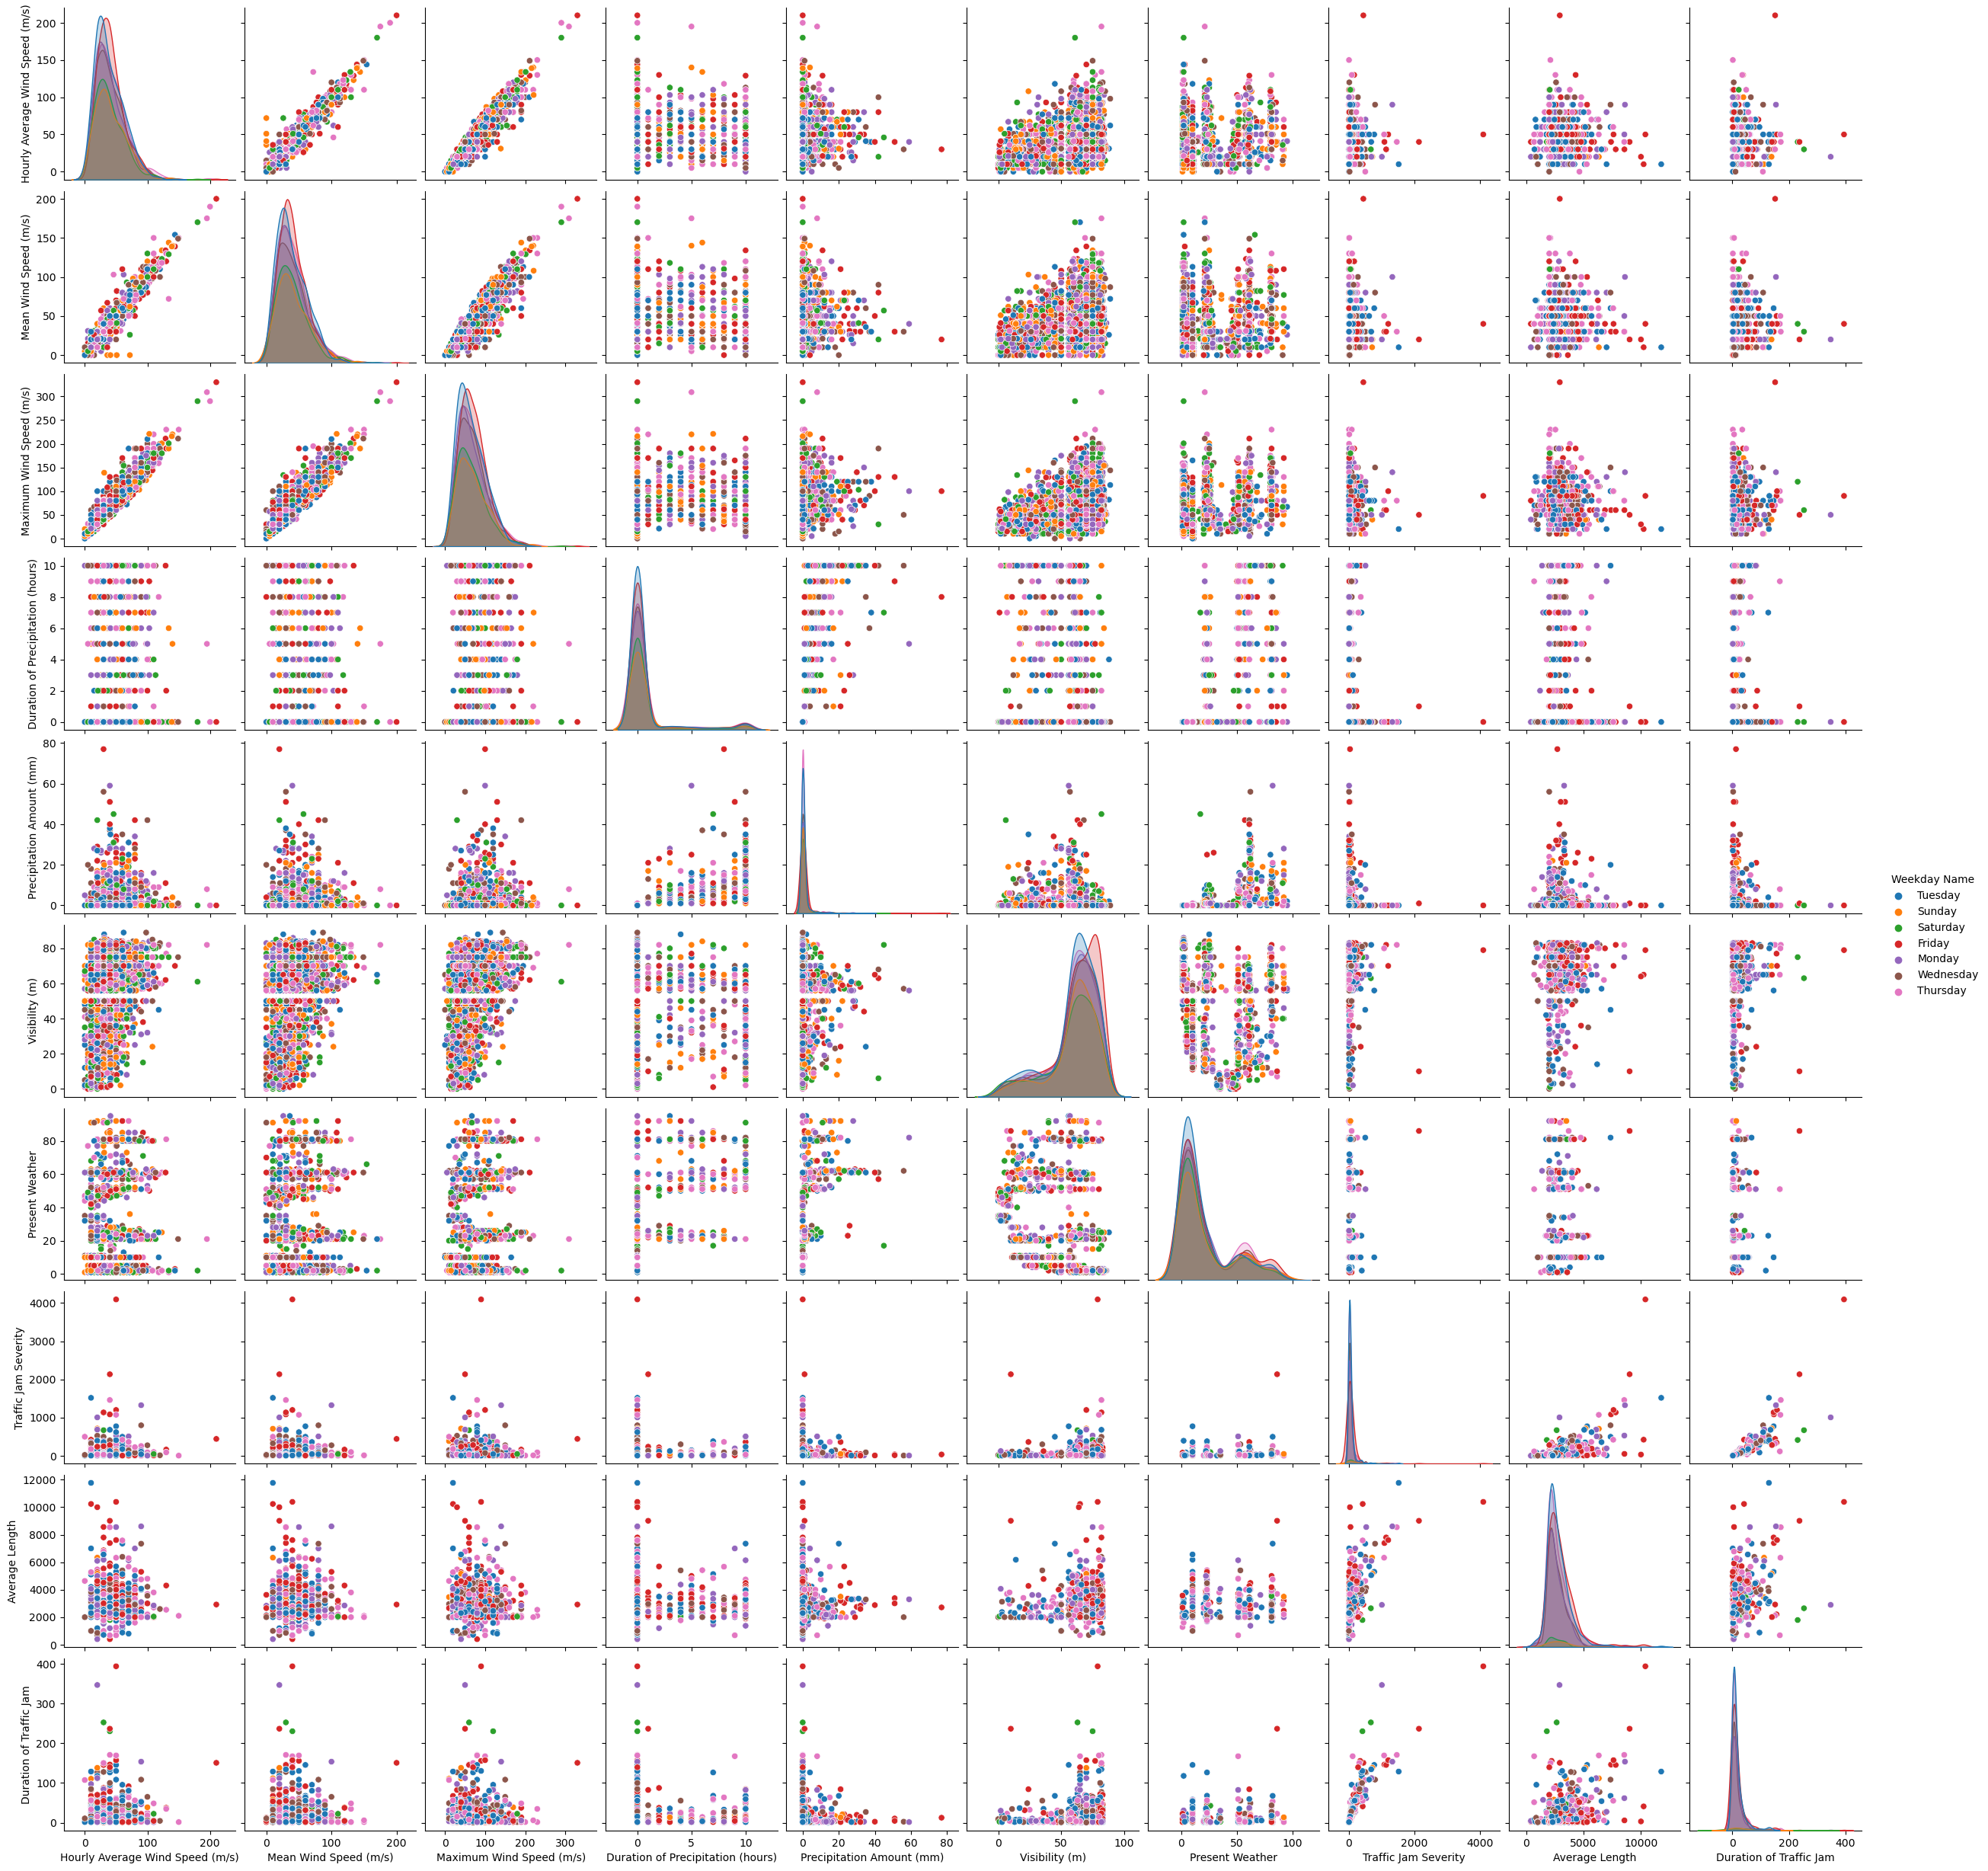

In [56]:
import seaborn as sns

columns_to_drop = ['LON(east)', 'LAT(north)', 'Rainfall Indicator', 'Snow Indicator',
       'Fog Indicator', 'Ice Formation Indicator', 'Site Number', 'Route Number', 'Weather Station Type', 'ALT(m)', 'Start Hectometer Marker', 'End Hectometer Marker' ]
categorical_data = merged_data.select_dtypes(exclude=['int32', 'int64'])
categorical_data = categorical_data.drop(columns=columns_to_drop)
sns.pairplot(categorical_data.sample(5000), hue="Weekday Name")

As the dataset has a lot of columns and rows, it would take to much time to try and see the results of a pairplot on all data. However, we could keep the number of relevant columns, but simply reduce the rows to a reasonable number, so that we can still spot a trend, while taking all columns into account.

We are specifically interested in **Duration of the traffic jam** and **Severity of the traffic jam**. We can observe already that these 2 form some kind of linear relationship, therefore leading us to think that the grade given for severity is heavily influenced also by duration. We can also see, for both of them, that they are somewhat displaying a linear relationship with the **Average Length**, although not as strong. 

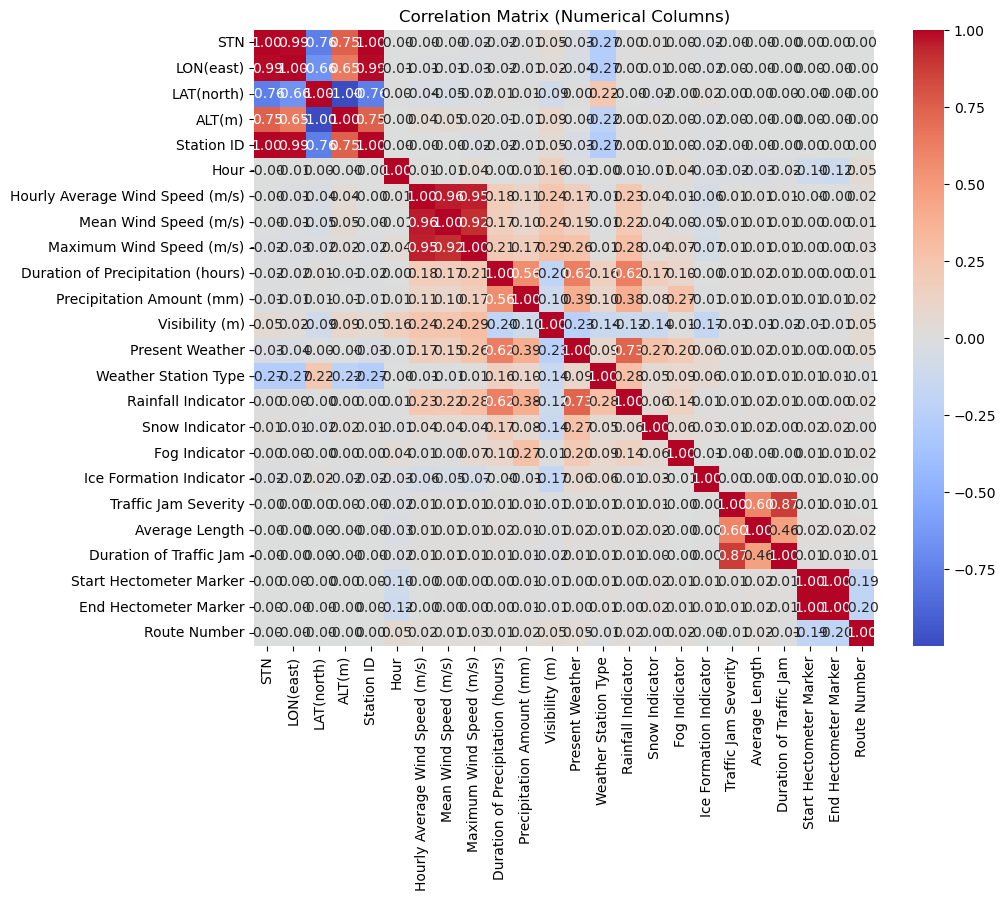

In [57]:
# Selecting only the numerical columns
numerical_columns = merged_data.select_dtypes(include=['int64', 'float64', 'int32'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

We can not observe any relevant correlations. :-( This, however, is constant with our discoveries from the pairplot, as we can only observe the same main correlations we could also spot from the initial graphs. I am making this message to test the push-commit-pull chain. ddd